<div style='background-color: dark; padding: 20px'>
<h1 style='color: orange; fontweight: bold'>Produisez une étude de marché avec Python</h1>
<h3 style='color: orange; fontweight: bold'>Notebook II : Clustering et visualisations</h3>
</div>

<div style='background-color: white; padding: 20px'>
<h3 style='color: black; fontweight: bold'><b>La mission</b>:</h3>
<p style='color: black; fontweight: bold'>La poule qui chante, une entreprise française d’agroalimentaire, souhaite se développer à l'international. Il s'agira de de proposer une première analyse des groupements de pays que l’entreprise peut cibler pour exporter ses poulets.<br><br> En partant des données de la FAO (Food and Agriculture Organization), avec la possibilité d'utiliser toutes les données en open data disponibles sur leur site, réaliser une classification ascendante hiérarchique puis effectuer un clustering en utilisant la méthode du K-means et comparer les résultats des deux méthodes. Enfin, réaliser une ACP afin de comprendre les groupes, les liens entre les variables, les liens entre les individus, etc...
</p>
</div>

<div style='background-color: white; padding: 10px'>
<h5 style='color: blue; fontweight: bold'>Import des bibliothèques Python nécessaires</h5>
</div>

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

from mpl_toolkits.mplot3d import Axes3D
from adjustText import adjust_text

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Étape 1 - Afficher la matrice de corrélation entre les variables</h2>
</div>

In [52]:
# Lire et afficher le dataframe créé pendant la phase exploratoire des données
df = pd.read_csv('La_poule_qui_chante.csv')
df.head()

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
0,Afrique du Sud,59392255,25,0.034,1910000,345579,5.82,276.380,0.01,7055,-0.71
1,Allemagne,83408554,41538,107.664,1080000,475449,5.70,1224.784,8.74,51073,0.76
2,Angola,34503774,381,0.456,55385,240449,6.97,236.981,0.16,2044,-0.71
3,Arabie saoudite,35950396,57317,104.389,930000,597975,16.63,1176.778,9.59,23185,-0.58
4,Arménie,2790974,261,0.219,14600,37734,13.52,43.488,0.69,4966,-0.84


In [53]:
# Afficher les dimensions
# Nous avons 97 pays et 11 variables
df.shape

(97, 11)

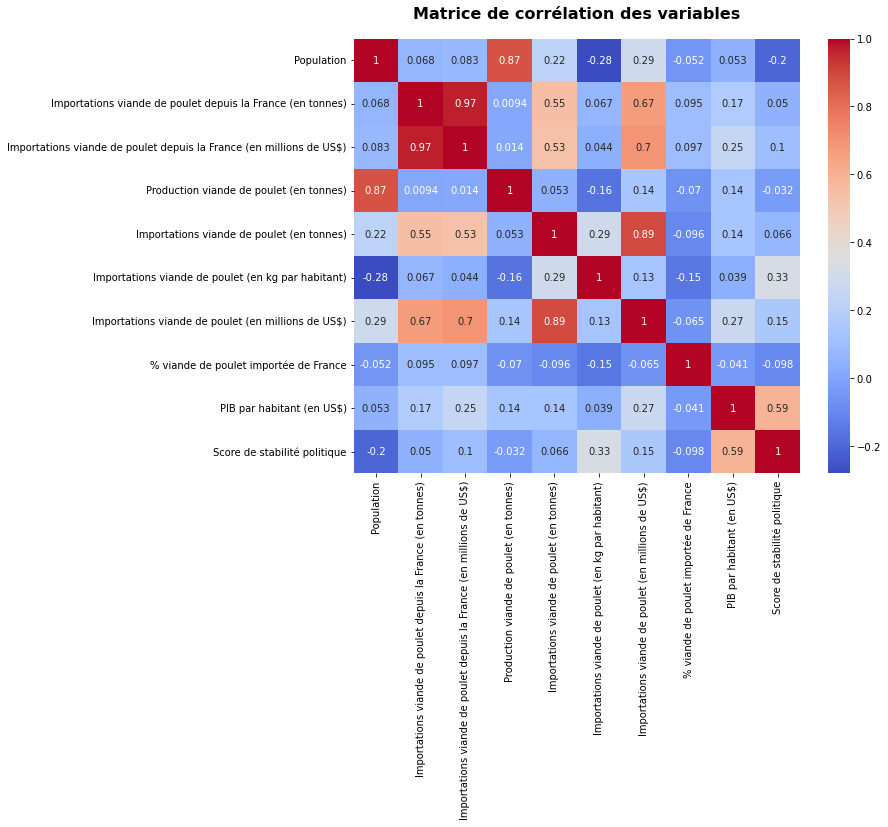

In [54]:
# Afficher la matrice de corrélation
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables', fontsize=16, fontweight='bold', pad=20)
plt.show()

<div style='background-color: white; padding: 10px'>
<p style='color: black'>On constate que <b>la variable "% viande de poulet importée de France" n'est fortement corrélée à aucune autre variable sinon elle-même. On peut donc la supprimer</b>. On va également supprimer la variable 'Zone' car elle n'est pas quantitative.</p>
</div>

In [55]:
# Afficher et copier les colonnes du df
df.columns

Index(['Zone', 'Population',
       'Importations viande de poulet depuis la France (en tonnes)',
       'Importations viande de poulet depuis la France (en millions de US$)',
       'Production viande de poulet (en tonnes)',
       'Importations viande de poulet (en tonnes)',
       'Importations viande de poulet (en kg par habitant)',
       'Importations viande de poulet (en millions de US$)',
       '% viande de poulet importée de France', 'PIB par habitant (en US$)',
       'Score de stabilité politique'],
      dtype='object')

In [56]:
# Créer un nouveau dataframe dépouillé des colonnes "Zone" et "% viande de poulet importée de France"
colonnes = [
    #    'Zone', 
       'Population',
       'Importations viande de poulet depuis la France (en tonnes)',
       'Importations viande de poulet depuis la France (en millions de US$)',
       'Production viande de poulet (en tonnes)',
       'Importations viande de poulet (en tonnes)',
       'Importations viande de poulet (en kg par habitant)',
       'Importations viande de poulet (en millions de US$)',
    #    '% viande de poulet importée de France', 
       'PIB par habitant (en US$)',
       'Score de stabilité politique']
df_CAH = df[colonnes]
df_CAH

,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),PIB par habitant (en US$),Score de stabilité politique
0,59392255,25,0.034,1910000,345579,5.82,276.380,7055,-0.71
1,83408554,41538,107.664,1080000,475449,5.70,1224.784,51073,0.76
2,34503774,381,0.456,55385,240449,6.97,236.981,2044,-0.71
3,35950396,57317,104.389,930000,597975,16.63,1176.778,23185,-0.58
4,2790974,261,0.219,14600,37734,13.52,43.488,4966,-0.84
...,...,...,...,...,...,...,...,...,...
92,32981641,3619,6.112,198879,147000,4.46,255.237,301,-2.59
93,19473125,135,0.108,50533,19511,1.00,23.090,1094,0.06
94,9365145,5424,11.517,46494,835237,89.19,751.827,43295,0.65
95,336997624,0,0.000,19003499,69962,0.21,335.975,69184,0.00


<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Étape 2 - Centrer et réduire les données</h2>
</div>

In [57]:
# soit soustraire de chaque valeur la moyenne puis diviser chaque valeur centrée par l'écart type

scaler = StandardScaler()

# Ajustement et transformation des données
df_scaled = scaler.fit_transform(df_CAH)

# Conversion du tableau numpy en dataframe
df_scaled = pd.DataFrame(df_scaled, index=df_CAH.index, columns=df_CAH.columns)
df_scaled.head()

,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),PIB par habitant (en US$),Score de stabilité politique
0,0.745435,-0.303469,-0.305485,0.522553,1.697514,-0.396689,0.461764,-0.554807,-0.803259
1,1.261419,4.622581,5.911918,0.178308,2.567249,-0.404296,4.047698,1.108977,0.760809
2,0.210712,-0.261225,-0.281108,-0.246654,0.993462,-0.323788,0.312795,-0.744212,-0.803259
3,0.241793,6.494962,5.722733,0.116095,3.387802,0.288576,3.866187,0.054872,-0.664940
4,-0.470629,-0.275464,-0.294798,-0.263570,-0.364113,0.091428,-0.418805,-0.633767,-0.941578


In [58]:
# Vérifier si on a bien une moyenne de 0 et un écart type de 1
idx = ["mean", "std"]
df_scaled.describe().round(2).loc[idx, :]

,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),PIB par habitant (en US$),Score de stabilité politique
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01


<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Étape 3 - Classification Ascendante Hiérarchique</h2>
</div>

In [59]:
# Sélectionner, pour commencer, toutes les variables
variables  = ['Population', 'Importations viande de poulet depuis la France (en tonnes)',
              'Importations viande de poulet depuis la France (en millions de US$)',
              'Production viande de poulet (en tonnes)',
              'Importations viande de poulet (en tonnes)', 
               'Importations viande de poulet (en kg par habitant)',
               'Importations viande de poulet (en millions de US$)',
               'PIB par habitant (en US$)',
               'Score de stabilité politique'
              ]

In [60]:
# Calculer les distances à l'aide de la fonction linkage de scipy
Z = linkage(df_scaled[variables], 'ward')
pd.DataFrame(Z)

,0,1,2,3
0,13.0,61.0,0.102062,2.0
1,7.0,14.0,0.212461,2.0
2,52.0,84.0,0.256554,2.0
3,17.0,93.0,0.271503,2.0
4,18.0,97.0,0.287413,3.0
...,...,...,...,...
91,180.0,187.0,10.044667,47.0
92,184.0,185.0,11.076146,7.0
93,186.0,188.0,14.052690,88.0
94,181.0,190.0,17.519410,90.0


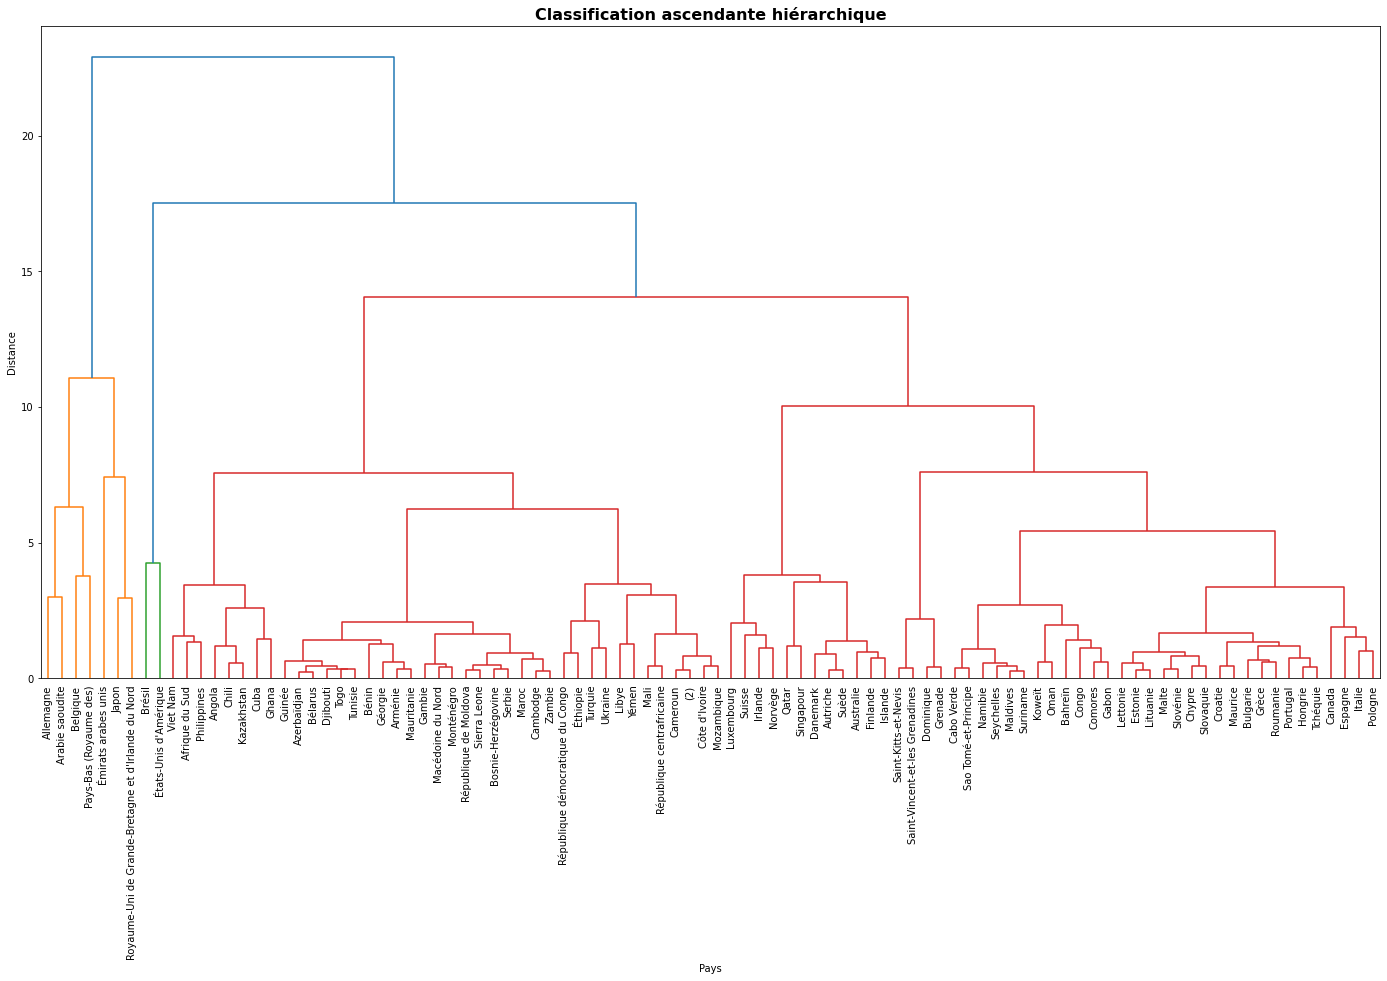

In [61]:
# Générer et afficher le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

_ = dendrogram(Z, labels=df['Zone'].values, p=96, truncate_mode="lastp", orientation='top', ax=ax)

plt.title("Classification ascendante hiérarchique", fontsize=16, fontweight='bold')
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.xticks(rotation=90, fontsize=10)
plt.show()

<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>On distingue à ce stade 3 principaux clusters dont on ne sait pas grand chose pour le moment. Réduisons le nombre de variables pour n'utiliser que les plus pertinentes et ce faisant voir s'il y a des changements significatifs.</p>
</div>

In [62]:
# Sélectionner uniquement 2 variables concernant le commerce de viande de poulet
variables  = ['Importations viande de poulet depuis la France (en tonnes)',
            #   'Importations viande de poulet depuis la France (en millions de US$)',
            #   'Production viande de poulet (en tonnes)',
              'Importations viande de poulet (en tonnes)', 
            #    'Importations viande de poulet (en kg par habitant)',
            #    'Importations viande de poulet (en millions de US$)'
              ]

In [63]:
# Calculer les distances à l'aide de la fonction linkage de scipy
Z = linkage(df_scaled[variables], 'ward')
pd.DataFrame(Z)

,0,1,2,3
0,5.0,88.0,0.000060,2.0
1,18.0,56.0,0.000380,2.0
2,53.0,97.0,0.000421,3.0
3,29.0,74.0,0.000490,2.0
4,17.0,99.0,0.001080,4.0
...,...,...,...,...
91,3.0,187.0,3.537925,4.0
92,184.0,186.0,3.833211,86.0
93,182.0,185.0,4.117695,7.0
94,189.0,190.0,9.904858,93.0


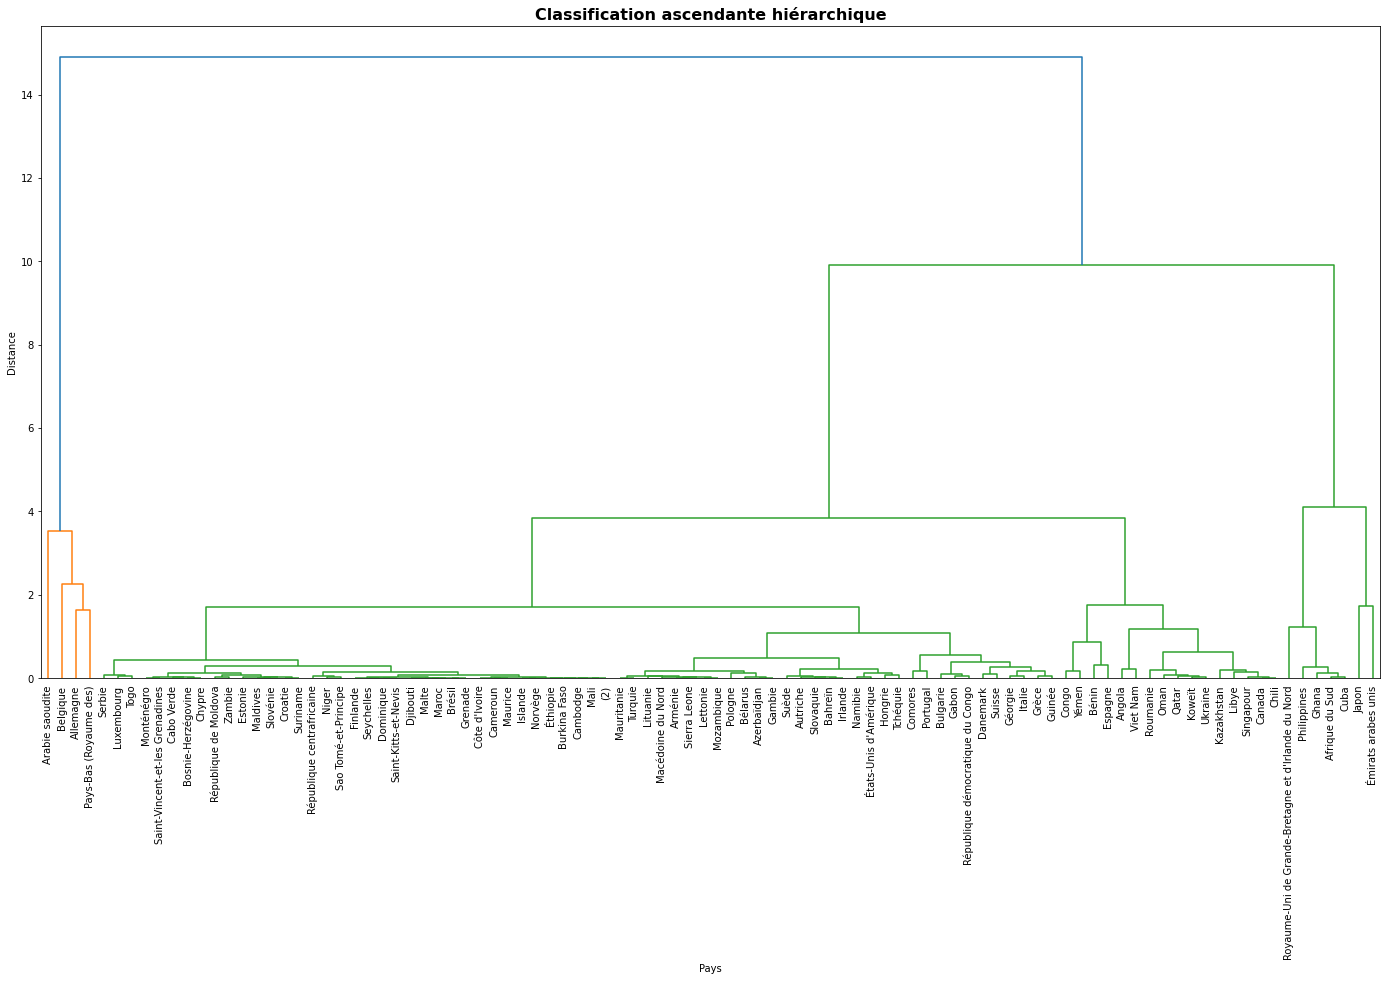

In [64]:
# Générer et afficher le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

_ = dendrogram(Z, labels=df['Zone'].values, p=96, truncate_mode="lastp", orientation='top', ax=ax)

plt.title("Classification ascendante hiérarchique", fontsize=16, fontweight='bold')
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [65]:
# A gauche du dendrogramme ci-dessus, un petit groupe de pays se distingue des autres, voyons ce qu'ils ont en commun:
pays = ['Arabie saoudite', 'Pays-Bas (Royaume des)', 'Allemagne', 'Belgique']
df.loc[df['Zone'].isin(pays)]


,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
1,Allemagne,83408554,41538,107.664,1080000,475449,5.70,1224.784,8.74,51073,0.76
3,Arabie saoudite,35950396,57317,104.389,930000,597975,16.63,1176.778,9.59,23185,-0.58
9,Belgique,11611419,36834,71.283,447710,213644,18.40,412.122,17.24,51165,0.61
64,Pays-Bas (Royaume des),17501696,28141,40.571,869380,530277,30.30,986.932,5.31,57871,0.92


<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>
On remarque que l'Allemagne, l'Arabie Saoudite, les Pays-Bas et la Belgique sont de grands importateurs de viande de poulet...et qu'une part non négligeable de leurs importations provient de France. Creusons davantage...</p>
</div>

In [66]:
# Sélectionner toutes les variables d'importations (en quantité)
variables  = ['Importations viande de poulet depuis la France (en tonnes)', 
              'Importations viande de poulet (en tonnes)', 
              'Importations viande de poulet (en kg par habitant)',
              ]

# Calculer les distances à l'aide de la fonction linkage de scipy
Z = linkage(df_scaled[variables], 'ward')
pd.DataFrame(Z)

,0,1,2,3
0,5.0,53.0,0.000395,2.0
1,88.0,97.0,0.000749,3.0
2,17.0,98.0,0.001111,4.0
3,13.0,99.0,0.002138,5.0
4,96.0,100.0,0.003408,6.0
...,...,...,...,...
91,113.0,183.0,4.728742,17.0
92,94.0,182.0,7.650605,7.0
93,188.0,189.0,8.781002,24.0
94,186.0,190.0,10.988448,93.0


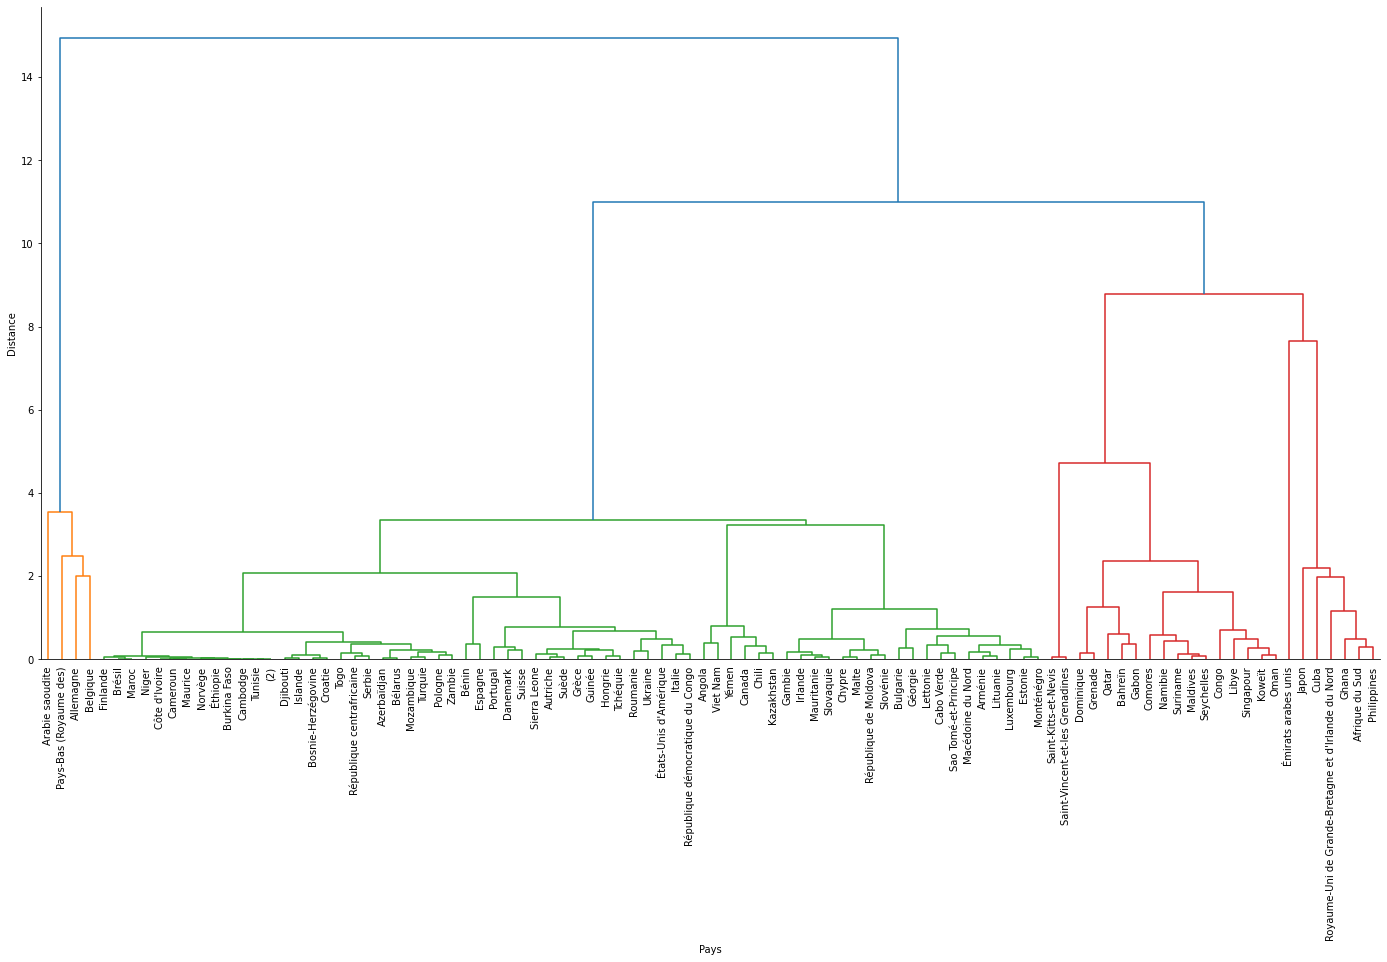

In [67]:
# Générer et afficher le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

_ = dendrogram(Z, labels=df['Zone'].values, p=96, truncate_mode="lastp", orientation='top', ax=ax)

# plt.title("Classification ascendante hiérarchique", fontsize=16, fontweight='bold')
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.xticks(rotation=90, fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [68]:
# Visualiser les données pour les 7 pays qui se trouvent dans les clusters rouges tout à droite
gros_importateurs_viande_poulet_monde = ['Émirats arabes unis', 'Japon', 'Cuba', 'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord', 'Ghana', 'Afrique du Sud', 'Philippines']
df.loc[df['Zone'].isin(gros_importateurs_viande_poulet_monde)]


,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
0,Afrique du Sud,59392255,25,0.034,1910000,345579,5.82,276.380,0.01,7055,-0.71
25,Cuba,11256372,3,0.015,17918,341135,30.31,361.960,0.00,11255,0.43
35,Ghana,32833031,439,0.540,65190,357456,10.89,457.058,0.12,2408,0.07
44,Japon,124612530,38,0.373,2343000,595830,4.78,1200.262,0.01,39649,1.03
65,Philippines,113880328,1919,1.910,1343496,359910,3.16,385.287,0.53,3460,-0.93
70,Royaume-Uni de Grande-Bretagne et d'Irlande du...,67281039,8708,31.657,1841000,355374,5.28,1179.164,2.45,46541,0.54
94,Émirats arabes unis,9365145,5424,11.517,46494,835237,89.19,751.827,0.65,43295,0.65


<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>Ces pays sont de gros importateurs de viande de poulet mais seul un faible % de cette viande est importée de France.<br>
Ce qui différencie les Émirats arabes unis des 6 autres sont ses importations de viande de poulet par habitant extrêmement élevées, 89 kg par habitant !</p>
</div>

In [69]:
# Les autres pays en rouge sont des importateurs "moyens" comme on peut le voir ci-dessous:
autres_pays_clusters_rouges = ['Congo', 'Libye', 'Oman', 'Seychelles', 'Gabon', 'Qatar']
df.loc[df['Zone'].isin(autres_pays_clusters_rouges)]

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
23,Congo,5835806,4950,7.390,6884,138994,23.82,152.926,3.56,2200,-0.61
33,Gabon,2341179,2086,3.448,4111,73025,31.19,89.038,2.86,7910,-0.09
48,Libye,6735277,210,0.374,131085,129707,19.26,220.964,0.16,5791,-2.37
63,Oman,4520471,123,0.189,6564,114115,25.24,168.705,0.11,19509,0.51
68,Qatar,2688235,479,3.254,35344,106876,39.76,181.029,0.45,66798,0.96
78,Seychelles,106471,29,0.054,1470,2910,27.33,4.406,0.99,12084,0.76


In [70]:
# Si on prend maintenant un pays dans l'un des clusters en vert, les USA par exemple, on remarque
# que les importations de viande de poulet sont plutôt faibles en comparaison de celles des pays précédents et faibles vis à vis de leur production 
df.loc[df['Zone'].isin(['États-Unis d\'Amérique', 'Brésil', 'Italie', 'Pologne'])]

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
11,Brésil,214326223,0,0.000,14329000,5282,0.02,15.002,0.00,7507,-0.49
43,Italie,59240329,2255,5.053,1068500,54731,0.92,119.714,4.12,35578,0.58
66,Pologne,38307726,948,2.859,2096770,27279,0.71,58.400,3.47,17736,0.51
95,États-Unis d'Amérique,336997624,0,0.000,19003499,69962,0.21,335.975,0.00,69184,0.00


<div style='background-color: white; padding: 20px'>
<p style='color: blue; fontweight: bold'>Nous allons utiliser le score de silhouette pour déterminer le nombre idéal de clusters.</p>
</div>

In [71]:
# Le score de silhouette est compris entre 1 et -1
# Un score proche de 1 signifie que les pays sont correctement groupés dans les n_clusters, un score proche de -1 signifie l'inverse

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_scaled[variables])
    score = silhouette_score(df_scaled[variables], preds)
    print("Pour n_clusters = {}, le score de silhouette est de {}".format(n_clusters, score))

Pour n_clusters = 2, le score de silhouette est de 0.7448043934535435
Pour n_clusters = 3, le score de silhouette est de 0.5338599918884991
Pour n_clusters = 4, le score de silhouette est de 0.5638032409306467
Pour n_clusters = 5, le score de silhouette est de 0.5741231366630309
Pour n_clusters = 6, le score de silhouette est de 0.5592741665151303
Pour n_clusters = 7, le score de silhouette est de 0.5489178005267717
Pour n_clusters = 8, le score de silhouette est de 0.3779723519538035
Pour n_clusters = 9, le score de silhouette est de 0.40743481428801137


<div style='background-color: white; padding: 20px'>
<p style='color: black'>Le score silhouette le plus élevé est celui de nombre de clusters = 2. Cela dit, avec uniquement 2 groupes l'analyse manquera de profondeur. Par conséquent, on va sélectionner le deuxième meilleur score de silhouette qui correspond à nombre de clusters = 5. <br><br>A ce stade on peut donc distinguer 5 groupes de pays; <br>-<b>Les principaux importateurs de viande de poulet française</b> (en orange, tout à gauche sur le dendrogramme ci-dessus) <br>-<b>Les grands importateurs de viande de poulet</b>, tous pays de provenance confondus (en rouge tout à droite) <br>-<b>Les Émirats arabes unis</b>, pays qui importe le plus de viande de poulet et qui forme à lui-seul un cluster<br>-<b>Les importateurs moyens</b><br><b>-Les pays qui importent peu de viande de poulet</b> soit parce qu'ils en produisent beaucoup localement, ce qui est le cas des USA par exemple, soit parce qu'ils n'en consomment pas beaucoup (en vert)</p>
</div>

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Étape 4 - K-means</h2>
</div>

<div style='background-color: white; padding: 20px'>
<p style='color: black'>Essayons de grouper les pays en utilisant un autre algorithme de clustering; le K-means</p>
</div>

In [72]:
# Sélectionner uniquement deux variables pertinentes
kmeans_variables  = [
                    'Importations viande de poulet depuis la France (en tonnes)', 
                    'Importations viande de poulet (en tonnes)', 
                    # 'Importations viande de poulet (en kg par habitant)',
                    ]

Pays appartenant au Cluster 0: ['Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahreïn', 'Bosnie-Herzégovine', 'Brésil', 'Burkina Faso', 'Bélarus', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Chypre', 'Comores', 'Croatie', "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique', 'Estonie', 'Finlande', 'Gambie', 'Grenade', 'Grèce', 'Guinée', 'Géorgie', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macédoine du Nord', 'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Monténégro', 'Mozambique', 'Namibie', 'Niger', 'Norvège', 'Pologne', 'Portugal', 'République centrafricaine', 'République de Moldova', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sao Tomé-et-Principe', 'Serbie', 'Seychelles', 'Sierra Leone', 'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie', 'Togo', 'Tunisie', 'Turquie', 'Zambie', "États-Unis d'Amérique", 'Éthiopie']
Pays appartenant au Cluster 1: ['Allemagne', 'Arabie saoudite', 'Belgique', 'Pay

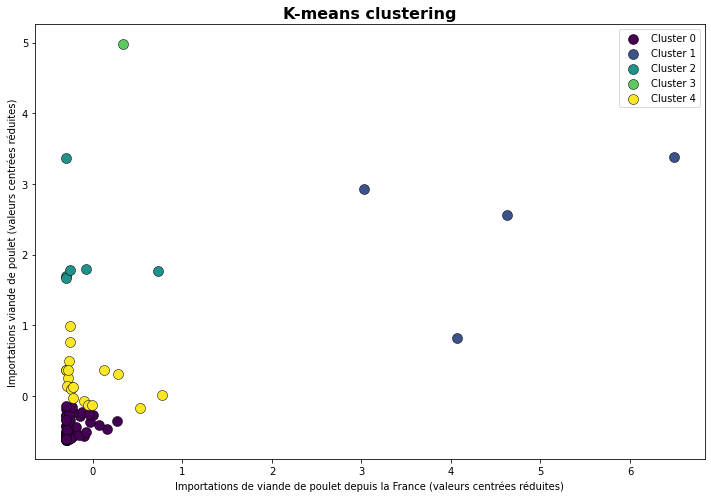

In [73]:
# Entraîner un K-means et afficher le nuage de points montrant les résultats du clustering

clf = KMeans(n_clusters = 5).fit(df_scaled[kmeans_variables])
predictions = clf.predict(df_scaled[kmeans_variables])

labels = df['Zone'].values

# Créer un dictionnaire pour stocker les noms de pays de chaque cluster
# Les clés du dictionnaire sont les n° de cluster : 0, 1, 2, 3 et 4
# Face à chaque clé nous avons en guise de valeur une liste de pays
clusters = {i: [] for i in range(5)}
for i, prediction in enumerate(predictions):
    clusters[prediction].append(labels[i])  # Ajouter le nom des pays dans la liste du cluster correpondant


colors = cm.viridis(np.linspace(0, 1, 5))  # Créer une palette de couleurs

plt.figure(figsize=(12,8))

for cluster, countries in clusters.items():
    print(f"Pays appartenant au Cluster {cluster}: {countries}")
    points = np.array([df_scaled[kmeans_variables].iloc[i] for i in range(len(predictions)) if predictions[i] == cluster])
    plt.scatter(points[:, 0], points[:, 1], color=colors[cluster], s=100, edgecolor='black', linewidths=0.5)  # Attribuer une couleur de la palette à chaque cluster
    plt.scatter([], [], color=colors[cluster], label=f"Cluster {cluster}", s=100, edgecolor='black', linewidths=0.5) # Créer une légende avec la couleur et le n° de cluster

plt.legend(bbox_to_anchor=(0.865, 1), loc='upper left')
plt.title('K-means clustering', fontsize=16, fontweight='bold')
plt.xlabel('Importations de viande de poulet depuis la France (valeurs centrées réduites)')
plt.ylabel('Importations viande de poulet (valeurs centrées réduites)')
plt.show()


In [74]:
# On recommence en sélectionnant 3 variables
kmeans_variables  = [
                    'Importations viande de poulet depuis la France (en tonnes)', 
                    'Importations viande de poulet (en tonnes)', 
                    'Importations viande de poulet (en kg par habitant)',
                    ]

In [75]:
# On lance plusieurs fois l'algorithme de façon à trouver le nombre de clusters idéal

# Créer une liste vide qui va stocker l'inertie de chaque itération du k-means
inertie = []

# On définit une fourchette pour le nombre de clusters
# ici on précise qu'on veut au minimum 2 au maximum 10 clusters
k_range =  range(2, 11)

# Pour chaque nombre de clusters dans k_range on entraîne un K-means et on enregistre la valeur de l'inertie de chaque modèle.
# L'inertie d'un modèle correspond à la somme des inerties intra cluster. 
# C'est à dire que l'on calcule, pour chaque cluster, le carré de la distance entre chaque point du cluster et son centroide, puis on fait la somme de ces carrés
# ce qui nous donne l'inertie d'un cluster. Pour finir, on fait la somme des inerties pour chaque k clusters
for k in k_range:
    clf = KMeans(n_clusters = k).fit(df_scaled[kmeans_variables])
    clf.fit(df_scaled[kmeans_variables])
    inertie.append(clf.inertia_)


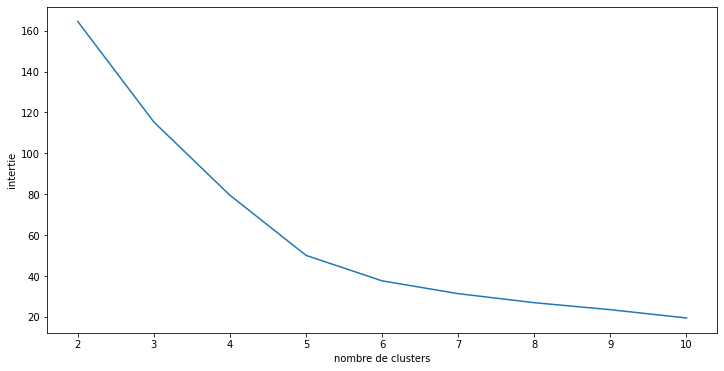

In [76]:
# On utilise la méthode du coude pour déterminer le nombre de clusters idéal
# le 'coude' le plus prononcé est situé à nombre de clusters = 5
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("intertie")
ax.set_xlabel("nombre de clusters")
ax = plt.plot(k_range, inertie)

Pays appartenant au Cluster 0: ['Bahreïn', 'Comores', 'Congo', 'Dominique', 'Gabon', 'Grenade', 'Koweït', 'Lettonie', 'Libye', 'Maldives', 'Namibie', 'Oman', 'Qatar', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Seychelles', 'Singapour', 'Suriname']
Pays appartenant au Cluster 1: ['Allemagne', 'Arabie saoudite', 'Belgique', 'Pays-Bas (Royaume des)']
Pays appartenant au Cluster 2: ['Afrique du Sud', 'Angola', 'Cuba', 'Ghana', 'Japon', 'Philippines', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Viet Nam']
Pays appartenant au Cluster 3: ['Émirats arabes unis']
Pays appartenant au Cluster 4: ['Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bosnie-Herzégovine', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili', 'Chypre', 'Croatie', "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Espagne', 'Estonie', 'Finlande', 'Gambie', 'Grèce', 'Guinée', 'Géorgie', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Kazakhstan

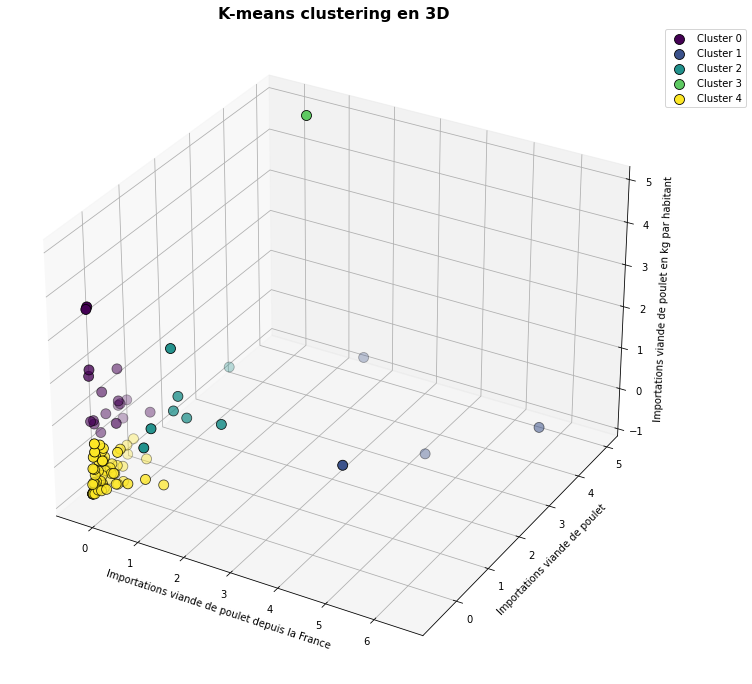

In [77]:
# Entraîner un K-means avec nombre de clusters = 5 et afficher le nuage de points montrant les résultats du clustering
clf = KMeans(n_clusters = 5).fit(df_scaled[kmeans_variables])
predictions = clf.predict(df_scaled[kmeans_variables])

labels = df['Zone'].values

clusters = {i: [] for i in range(5)}
for i, prediction in enumerate(predictions):
    clusters[prediction].append(labels[i]) 

colors = cm.viridis(np.linspace(0, 1, 5)) 

# On affiche un nuage de points en 3D car nous avons sélectionné 3 variables
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')

for cluster, countries in clusters.items():
    print(f"Pays appartenant au Cluster {cluster}: {countries}")
    points = np.array([df_scaled[kmeans_variables].iloc[i] for i in range(len(predictions)) if predictions[i] == cluster])
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color=colors[cluster], edgecolor='black', linewidths=0.8, s=100) 
    ax.scatter([], [], [], color=colors[cluster], label=f"Cluster {cluster}", edgecolor='black', linewidths=0.8, s=100) 

ax.set_xlabel('Importations viande de poulet depuis la France')
ax.set_ylabel('Importations viande de poulet')
ax.set_zlabel('Importations viande de poulet en kg par habitant')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('K-means clustering en 3D', fontsize=16, fontweight='bold')
plt.show()


<div style='background-color: white; padding: 20px'>
<p style='color: red'><b>Les résultats obtenus avec le K-means sont assez proches de ceux obtenus avec la CAH !</b></p>
</div>

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Étape 5 - Analyse en Composantes Principales</h2>
</div>

In [78]:
# L'ACP va nous permettre de réduire les dimensions du dataframe en créant des variables synthétiques à partir des varibles existantes
# On va utiliser notre dataframe df_scaled qui a été centré réduit précédemment
df_scaled.head()

,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),PIB par habitant (en US$),Score de stabilité politique
0,0.745435,-0.303469,-0.305485,0.522553,1.697514,-0.396689,0.461764,-0.554807,-0.803259
1,1.261419,4.622581,5.911918,0.178308,2.567249,-0.404296,4.047698,1.108977,0.760809
2,0.210712,-0.261225,-0.281108,-0.246654,0.993462,-0.323788,0.312795,-0.744212,-0.803259
3,0.241793,6.494962,5.722733,0.116095,3.387802,0.288576,3.866187,0.054872,-0.664940
4,-0.470629,-0.275464,-0.294798,-0.263570,-0.364113,0.091428,-0.418805,-0.633767,-0.941578


In [79]:
# Afficher les colonnes du dataframe
df_scaled.columns

Index(['Population',
       'Importations viande de poulet depuis la France (en tonnes)',
       'Importations viande de poulet depuis la France (en millions de US$)',
       'Production viande de poulet (en tonnes)',
       'Importations viande de poulet (en tonnes)',
       'Importations viande de poulet (en kg par habitant)',
       'Importations viande de poulet (en millions de US$)',
       'PIB par habitant (en US$)', 'Score de stabilité politique'],
      dtype='object')

In [80]:
# Définir les variables à utiliser lors de l'ACP
variables = [
       'Population',
       'Importations viande de poulet depuis la France (en tonnes)',
       'Importations viande de poulet depuis la France (en millions de US$)',
       'Production viande de poulet (en tonnes)',
       'Importations viande de poulet (en tonnes)',
       'Importations viande de poulet (en kg par habitant)',
       'Importations viande de poulet (en millions de US$)',
       'PIB par habitant (en US$)', 
       'Score de stabilité politique'
       ]

In [81]:
# Lister les individus (en l'occurrence les pays)
countries  = df['Zone'].values
countries 

array(['Afrique du Sud', 'Allemagne', 'Angola', 'Arabie saoudite',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahreïn',
       'Belgique', 'Bosnie-Herzégovine', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chypre', 'Comores', 'Congo',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'Espagne', 'Estonie', 'Finlande', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guinée', 'Géorgie', 'Hongrie',
       'Irlande', 'Islande', 'Italie', 'Japon', 'Kazakhstan', 'Koweït',
       'Lettonie', 'Libye', 'Lituanie', 'Luxembourg', 'Macédoine du Nord',
       'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie',
       'Monténégro', 'Mozambique', 'Namibie', 'Niger', 'Norvège', 'Oman',
       'Pays-Bas (Royaume des)', 'Philippines', 'Pologne', 'Portugal',
       'Qatar', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
    

In [82]:
# Déterminer un nombre de composantes permettant de capter près de 90 % de l'inertie, 
# puis instancier et entraîner l'ACP

number_components = 9 # ne peut pas dépasser le nombre de variables du jeu de données
pca = PCA(n_components=number_components)
pca.fit(df_scaled)

PCA(n_components=9)

In [83]:
# Afficher le pourcentage de variance captée par chacune des 9 composantes
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([37.45, 22.8 , 16.71, 11.21,  6.34,  3.58,  0.89,  0.77,  0.24])

In [84]:
# Afficher la variance captée cumulée (en %)
cum_sum = scree.cumsum().round(2)
cum_sum

array([37.45, 60.25, 76.96, 88.17, 94.51, 98.09, 98.98, 99.75, 99.99])

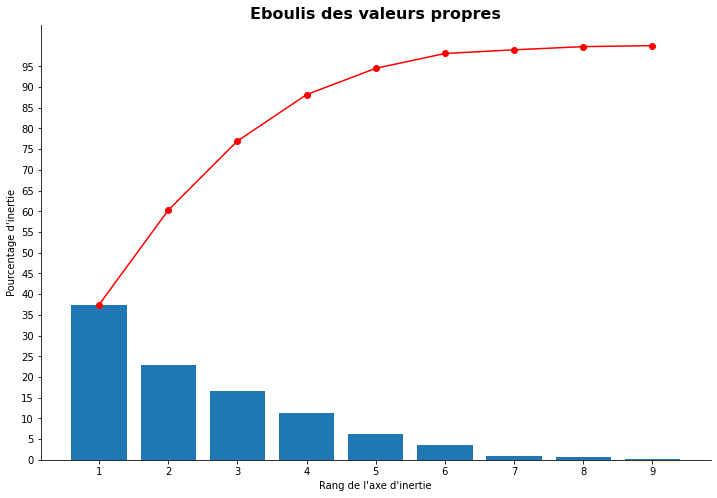

In [85]:
# Afficher l'éboulis des valeurs propres
components_list = range(1, number_components+1)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.bar(components_list, scree)
plt.plot(components_list, cum_sum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.yticks(np.arange(0, 100, 5))
plt.xticks(np.arange(1, 10, 1))
plt.title("Eboulis des valeurs propres", fontsize=16, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show(block=False)

<div style='background-color: white; padding: 20px'>
<p style='color: blue'>Les 4 principales composantes nous permettent de capter près de 90 % de l'inertie. On peut s'arrêter à 4 composantes.</p>
</div>

In [86]:
# Instancier et entraîner une PCA avec seulement 4 composantes
number_components = 4
pca = PCA(n_components=number_components)
pca.fit(df_scaled)
# scree = (pca.explained_variance_ratio_*100).round(2)
# cum_sum = scree.cumsum().round(2)

PCA(n_components=4)

In [87]:
# Transformer les composantes principales en dataframe
principal_components = pd.DataFrame(pca.components_)
principal_components.columns = variables
principal_components.columns

Index(['Population',
       'Importations viande de poulet depuis la France (en tonnes)',
       'Importations viande de poulet depuis la France (en millions de US$)',
       'Production viande de poulet (en tonnes)',
       'Importations viande de poulet (en tonnes)',
       'Importations viande de poulet (en kg par habitant)',
       'Importations viande de poulet (en millions de US$)',
       'PIB par habitant (en US$)', 'Score de stabilité politique'],
      dtype='object')

In [88]:
# Afficher les composantes
pca.components_

array([[ 0.15206956,  0.46621541,  0.47489741,  0.10359844,  0.44746174,
         0.10042674,  0.50279908,  0.21040696,  0.12598535],
       [ 0.63251401, -0.06336752, -0.06516733,  0.58049652, -0.0204427 ,
        -0.37169285,  0.02773221, -0.10807017, -0.32197185],
       [ 0.15617745, -0.23653656, -0.17962487,  0.3196545 , -0.11991085,
         0.12660161, -0.05193482,  0.60718401,  0.61922431],
       [ 0.14812874, -0.26868437, -0.3162056 ,  0.15022229,  0.38537714,
         0.70849046,  0.13767189, -0.33517539, -0.03928736]])

In [89]:
# Nommer les index du dataframe principal_components PC1, PC2, etc
components_list = range(1, number_components+1)
principal_components.index = [f"PC{i}" for i in components_list]

# On transpose le dataframe des composantes de façon à avoir celles-ci en colonnes et les variables en index
principal_components.T

,PC1,PC2,PC3,PC4
Population,0.152070,0.632514,0.156177,0.148129
Importations viande de poulet depuis la France (en tonnes),0.466215,-0.063368,-0.236537,-0.268684
Importations viande de poulet depuis la France (en millions de US$),0.474897,-0.065167,-0.179625,-0.316206
Production viande de poulet (en tonnes),0.103598,0.580497,0.319654,0.150222
Importations viande de poulet (en tonnes),0.447462,-0.020443,-0.119911,0.385377
Importations viande de poulet (en kg par habitant),0.100427,-0.371693,0.126602,0.708490
Importations viande de poulet (en millions de US$),0.502799,0.027732,-0.051935,0.137672
PIB par habitant (en US$),0.210407,-0.108070,0.607184,-0.335175
Score de stabilité politique,0.125985,-0.321972,0.619224,-0.039287


In [90]:
# Fonction qui génère et affiche le cercle des corrélations

def correlation_graph(pca, x_y, features):

    # Extrait x et y 
    x,y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(16, 12))

    texts = []
    
    # Générer une liste de couleurs
    colors = cm.viridis(np.linspace(0, 1, len(features)))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.04,
                head_length=0.04, 
                width=0.01, color=colors[i])

        # Les labels
        texts.append(plt.text(pca.components_[x, i] + 0.02,
                pca.components_[y, i] + 0.02,
                features[i], fontsize=10, color=colors[i]))


    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1), fontsize=16, fontweight='bold')

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    # Axes et display
    plt.axis('equal')

    # Ajustement automatique du texte
    adjust_text(texts)

    plt.show(block=False)
    

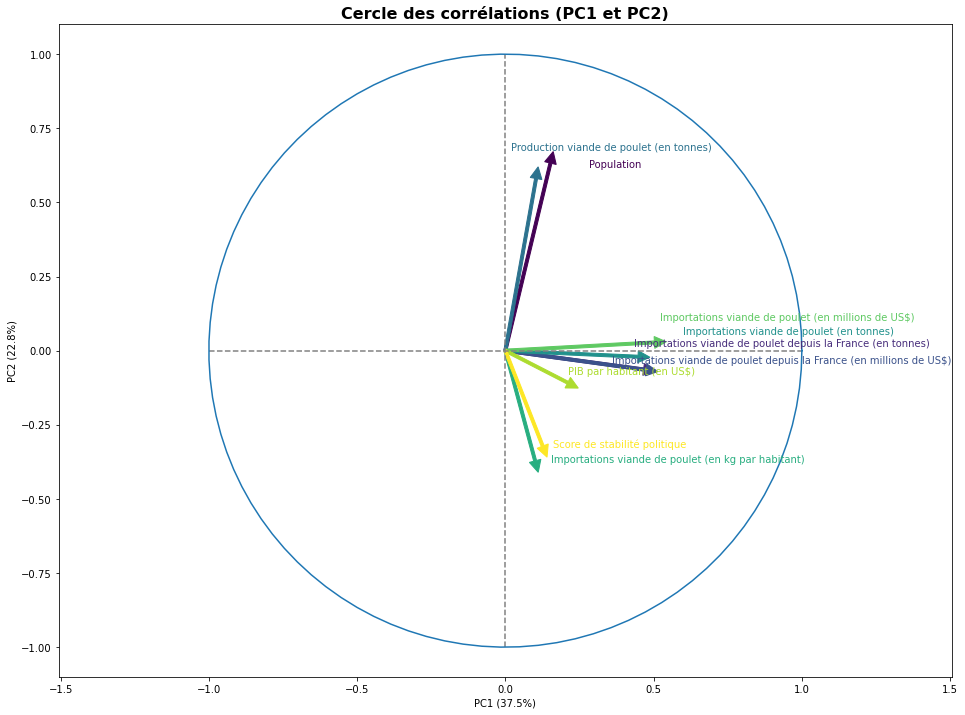

In [41]:
# Utiliser la fonction ci-dessus pour visualiser les corrélations sur les deux principaux axes
x_y = (0,1)
correlation_graph(pca, x_y, variables)

<div style='background-color: white; padding: 20px'>
<p style='color: black'><b>Quelques remarques</b>: <br><br>Sur le principal axe d'inertie, PC1, les variables importations (en tonnes et en US$) sont assez corrélées les unes aux autres (les angles entre leurs flèches respectives sont assez fermés). <br>Elles sont moyennement corrélées à PC1 car les flèches s'arrêtent à mi-rayon.<br><br>Sur l'axe PC2, la corrélation entre les variables "Population" et "Production viande de poulet" est forte. La longeur des flèches de ces deux variables signale une corrélation importante avec PC2. Les deux variables sont également légèrement anticorrélées aux importations de viande de poulet par habitant et au score de stabilité politique.</p>
</div>

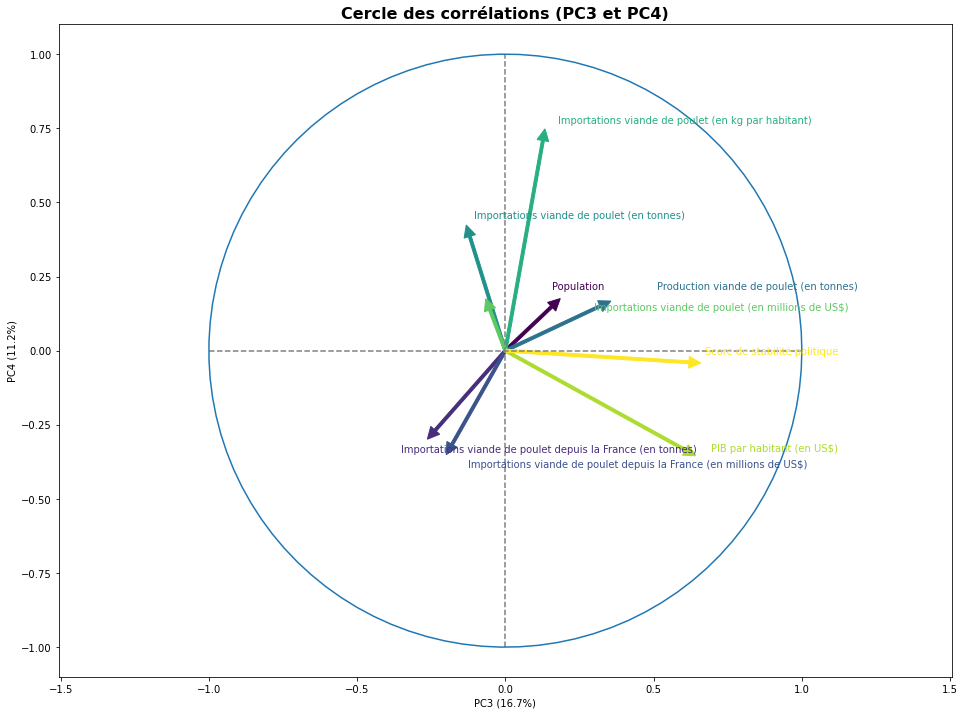

In [42]:
# Visualiser les corrélations sur les axes ayant une inertie moindre
x_y = (2,3)
correlation_graph(pca, x_y, variables)

<div style='background-color: white; padding: 20px'>
<p style='color: black'>On constate que les variables "PIB par habitant (en US$)" et "Score de stabilité politique" sont corrélées à l'axe PC3.<br>
Enfin, la variable "Importations viande de poulet (en kg par habitant)" est fortement corrélée à l'axe PC4.</p>
</div>

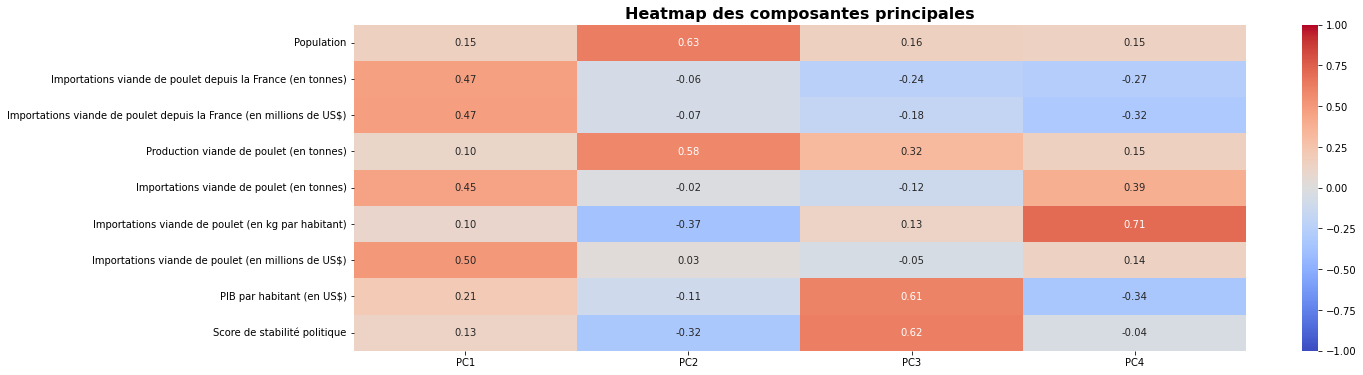

In [43]:
# Afficher la heatmap des corrélations entre variables et composantes principales
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(principal_components.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title('Heatmap des composantes principales', fontsize=16, fontweight='bold')
plt.show()

<div style='background-color: white; padding: 20px'>
<p style='color: black'>Ainsi on peut définir: <br><br> <b>PC1 comme étant la composante "Importations"</b>
<br><b>PC2 comme la composante "Production"</b><br> <b>PC3 comme la composante "politique et économique"</b><br><b>PC4 peut être décrite comme la composante "Consommation"</b> du fait de la forte corrélation de la variable "Importations de viande de poulet (en kg par habitant)" avec cet axe
</p>
</div>

In [44]:
# Projection des individus sur les composantes principales
df_proj = pca.transform(df_scaled)
df_proj[:5]

array([[ 0.61491247,  1.25811108, -0.70191069,  1.02127337],
       [ 8.64547885,  0.0684244 , -1.32611184, -2.03917685],
       [ 0.06271192,  0.47273815, -1.05928786,  0.63075388],
       [ 9.21113882, -0.42531245, -3.43828792, -1.45136617],
       [-0.98359244, -0.08051515, -0.93051716,  0.17413432]])

In [45]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (16,12)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=150)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8, linestyle='--')
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8, linestyle='--')

    # Affichage des labels des points
    texts = []
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            texts.append(plt.text(_x, _y+0.05, labels[i], fontsize=10, ha='center',va='center') )
            # plt.text(_x, _y+0.05, labels[i], fontsize=10, ha='center',va='center') 
    
    # Ajustement automatique du texte
    adjust_text(texts)

    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})", fontsize=16, fontweight='bold')
    plt.show()

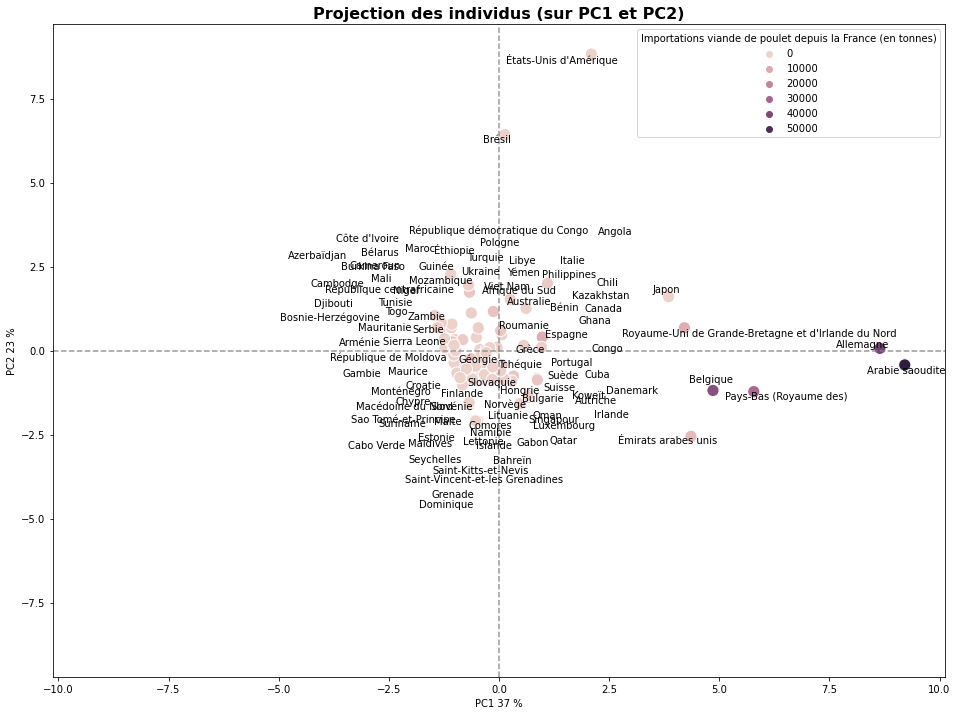

In [46]:
# Projection du nuage des individus (pays) sur les premiers axes d'inertie 
x_y = [0,1]
display_factorial_planes(df_proj, x_y, pca, labels=countries, figsize=(16,12), clusters=df['Importations viande de poulet depuis la France (en tonnes)'], marker="o")

<div style='background-color: white; padding: 20px'>
<p style='color: black'>Le groupe de pays excentrés vers la droite sur l'axe PC1 sont les principaux pays importateurs.<br>Les pays excentrés vers le haut sur l'axe PC2 sont les princpaux producteurs.</p>
</div>

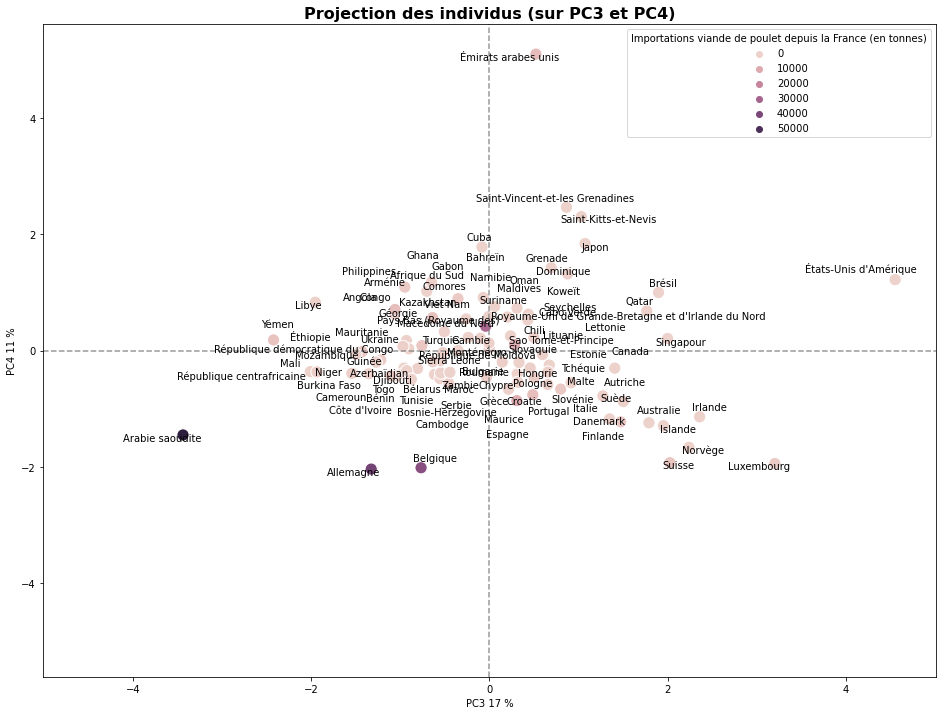

In [47]:
# Projection du nuage des individus (pays) sur les axes d'inertie 3 et 4
x_y = [2,3]
display_factorial_planes(df_proj, x_y, pca, labels=countries, figsize=(16,12), clusters=df['Importations viande de poulet depuis la France (en tonnes)'], marker="o")

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Étape 6 - Utiliser les composantes principales de l'ACP avec l'algorithme K-means</h2>
</div>

Pays appartenant au Cluster 0: ['Afrique du Sud', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bosnie-Herzégovine', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Djibouti', 'Guinée', 'Géorgie', 'Libye', 'Mali', 'Maroc', 'Mauritanie', 'Mozambique', 'Niger', 'Philippines', 'République centrafricaine', 'République de Moldova', 'République démocratique du Congo', 'Serbie', 'Sierra Leone', 'Togo', 'Tunisie', 'Turquie', 'Ukraine', 'Viet Nam', 'Yémen', 'Zambie', 'Éthiopie']
Pays appartenant au Cluster 1: ['Bahreïn', 'Bulgarie', 'Cabo Verde', 'Chili', 'Chypre', 'Comores', 'Congo', 'Croatie', 'Cuba', 'Dominique', 'Estonie', 'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Hongrie', 'Kazakhstan', 'Koweït', 'Lettonie', 'Lituanie', 'Macédoine du Nord', 'Maldives', 'Malte', 'Maurice', 'Monténégro', 'Namibie', 'Oman', 'Pologne', 'Portugal', 'Roumanie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sao Tomé-et-Principe', 'Seychelles', 'Slovaquie', 'Slovénie', 'Su

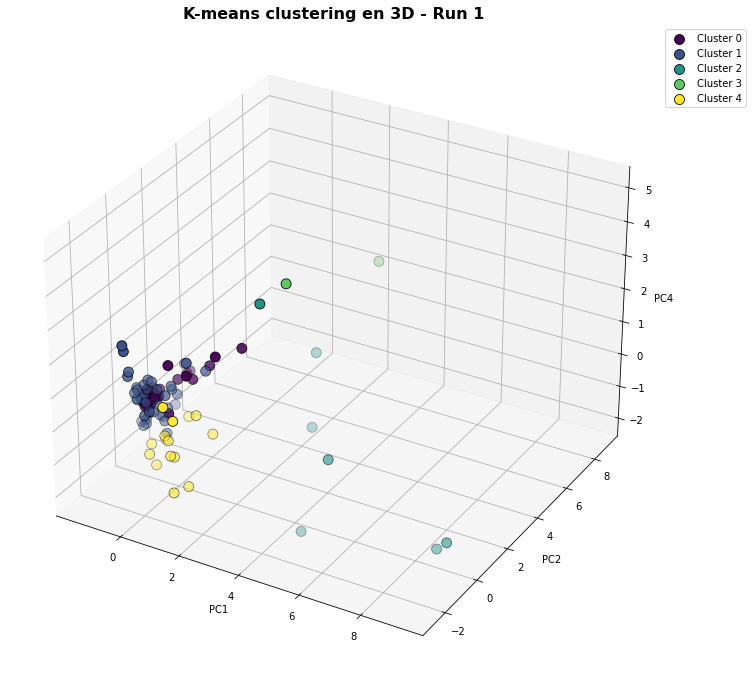

Pays appartenant au Cluster 0: ['Bahreïn', 'Cabo Verde', 'Cuba', 'Dominique', 'Gabon', 'Ghana', 'Grenade', 'Koweït', 'Lettonie', 'Maldives', 'Namibie', 'Oman', 'Qatar', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Seychelles', 'Suriname', 'Émirats arabes unis']
Pays appartenant au Cluster 1: ['Afrique du Sud', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bosnie-Herzégovine', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge', 'Cameroun', 'Chili', 'Comores', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Gambie', 'Grèce', 'Guinée', 'Géorgie', 'Kazakhstan', 'Libye', 'Macédoine du Nord', 'Mali', 'Maroc', 'Mauritanie', 'Monténégro', 'Mozambique', 'Niger', 'Philippines', 'Roumanie', 'République centrafricaine', 'République de Moldova', 'République démocratique du Congo', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Togo', 'Tunisie', 'Turquie', 'Ukraine', 'Viet Nam', 'Yémen', 'Zambie', 'Éthiopie']
Pays appartenant au Cluster 2: ['Australie', 'Autriche', 'Canada', 'Chypre', 'Croa

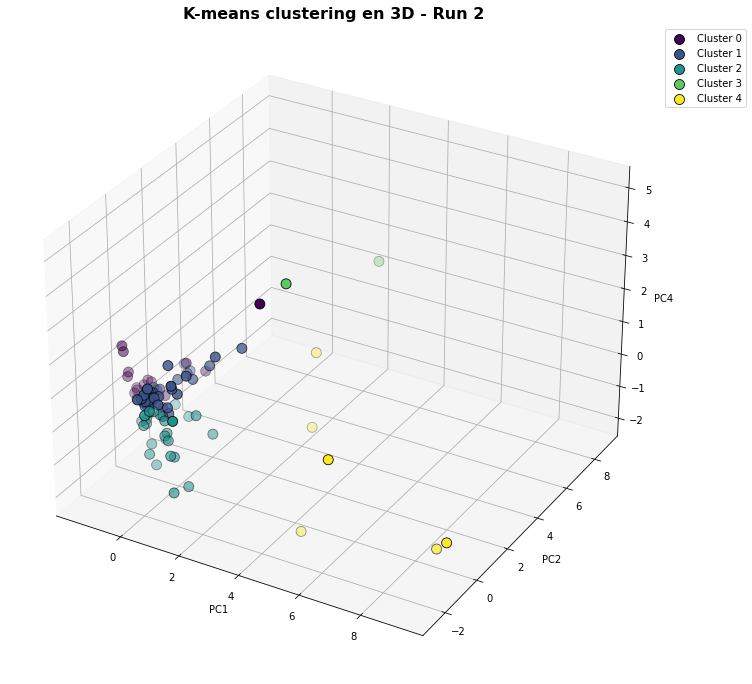

Pays appartenant au Cluster 0: ['Cuba', 'Dominique', 'Grenade', 'Qatar', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Émirats arabes unis']
Pays appartenant au Cluster 1: ['Afrique du Sud', 'Angola', 'Azerbaïdjan', 'Brésil', 'Burkina Faso', 'Bélarus', 'Cameroun', "Côte d'Ivoire", 'Guinée', 'Libye', 'Mali', 'Maroc', 'Mozambique', 'Niger', 'Philippines', 'République centrafricaine', 'République démocratique du Congo', 'Togo', 'Tunisie', 'Turquie', 'Ukraine', 'Viet Nam', 'Yémen', 'Éthiopie']
Pays appartenant au Cluster 2: ['Australie', 'Autriche', 'Canada', 'Danemark', 'Espagne', 'Finlande', 'Irlande', 'Islande', 'Italie', 'Luxembourg', 'Norvège', 'Singapour', 'Suisse', 'Suède', "États-Unis d'Amérique"]
Pays appartenant au Cluster 3: ['Allemagne', 'Arabie saoudite', 'Belgique', 'Japon', 'Pays-Bas (Royaume des)', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]
Pays appartenant au Cluster 4: ['Arménie', 'Bahreïn', 'Bosnie-Herzégovine', 'Bulgarie', 'Bénin', 'Cabo Verde'

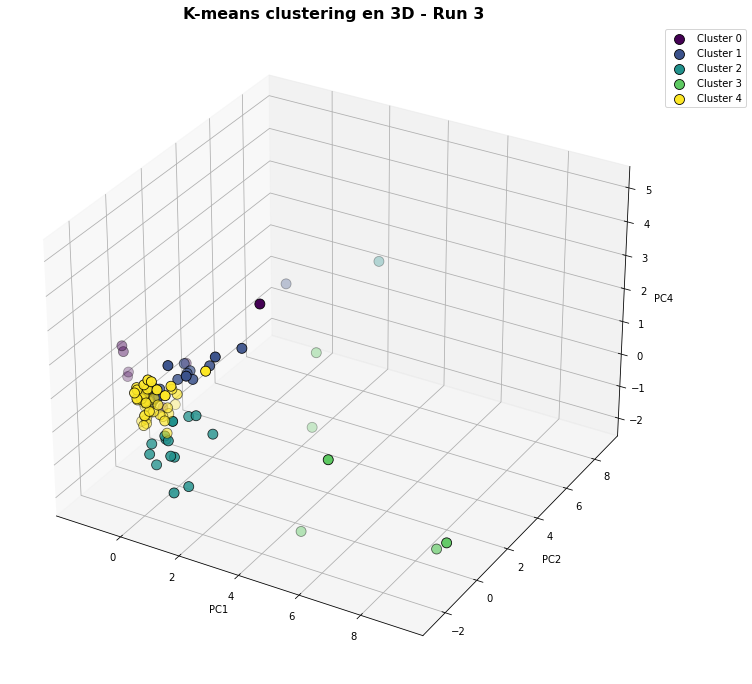

Pays appartenant au Cluster 0: ['Brésil', "États-Unis d'Amérique"]
Pays appartenant au Cluster 1: ['Afrique du Sud', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bosnie-Herzégovine', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Djibouti', 'Guinée', 'Géorgie', 'Kazakhstan', 'Libye', 'Mali', 'Maroc', 'Mauritanie', 'Mozambique', 'Niger', 'Philippines', 'Pologne', 'République centrafricaine', 'République de Moldova', 'République démocratique du Congo', 'Serbie', 'Sierra Leone', 'Togo', 'Tunisie', 'Turquie', 'Ukraine', 'Viet Nam', 'Yémen', 'Zambie', 'Éthiopie']
Pays appartenant au Cluster 2: ['Bahreïn', 'Bulgarie', 'Cabo Verde', 'Chili', 'Chypre', 'Comores', 'Congo', 'Croatie', 'Cuba', 'Dominique', 'Estonie', 'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Hongrie', 'Koweït', 'Lettonie', 'Lituanie', 'Macédoine du Nord', 'Maldives', 'Malte', 'Maurice', 'Monténégro', 'Namibie', 'Oman', 'Portugal', 'Qatar', 'Roumanie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Gre

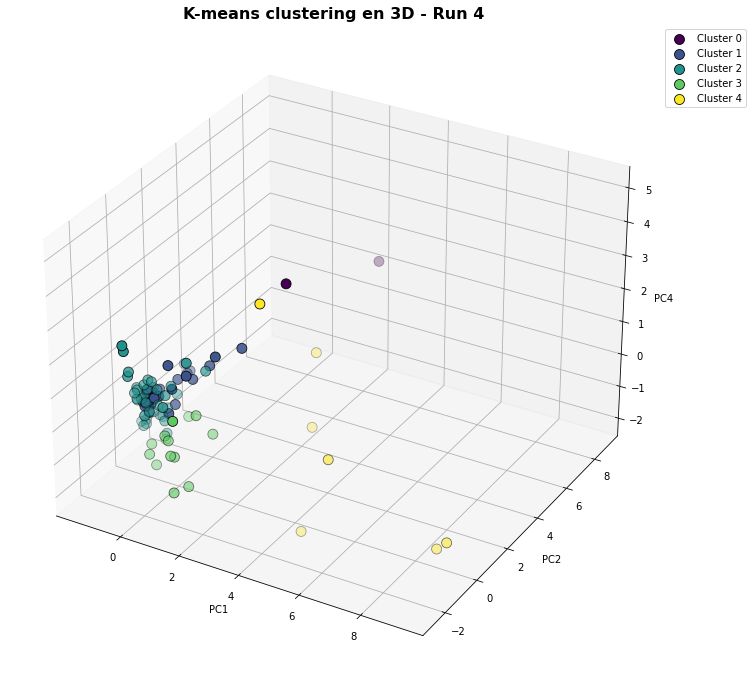

Pays appartenant au Cluster 0: ['Allemagne', 'Arabie saoudite', 'Belgique', 'Japon', 'Pays-Bas (Royaume des)', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis']
Pays appartenant au Cluster 1: ['Australie', 'Autriche', 'Bahreïn', 'Bulgarie', 'Cabo Verde', 'Canada', 'Chili', 'Chypre', 'Croatie', 'Cuba', 'Danemark', 'Dominique', 'Espagne', 'Estonie', 'Finlande', 'Gabon', 'Grenade', 'Grèce', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Maldives', 'Malte', 'Maurice', 'Namibie', 'Norvège', 'Oman', 'Pologne', 'Portugal', 'Qatar', 'Roumanie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sao Tomé-et-Principe', 'Seychelles', 'Singapour', 'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie']
Pays appartenant au Cluster 2: ['Arménie', 'Azerbaïdjan', 'Bosnie-Herzégovine', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge', 'Cameroun', 'Comores', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Gambie', 'Guinée

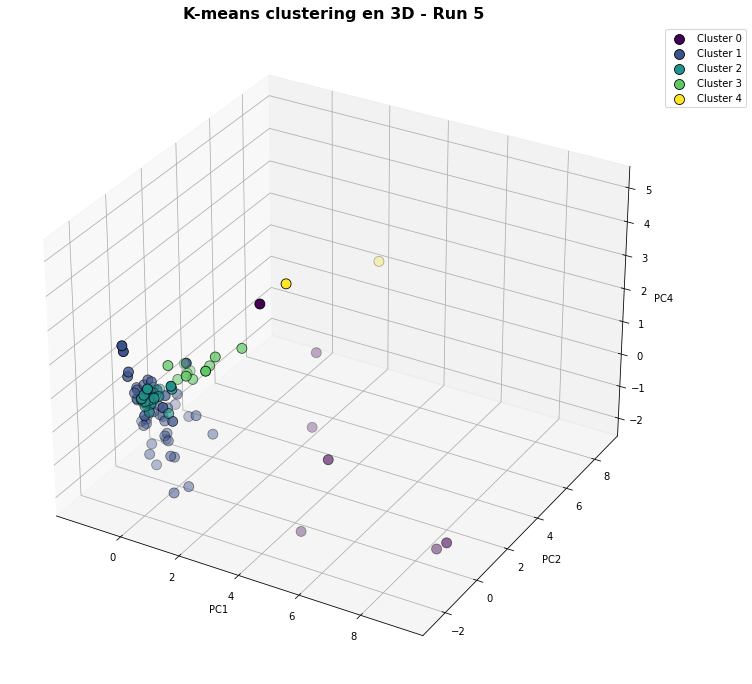

In [48]:
# Utiliser les 3 composantes principales de l'ACP avec le K-means
number_components = 4
pca = PCA(n_components=number_components)
pca_data = pca.fit_transform(df_scaled)

labels = df['Zone'].values

colors = plt.cm.viridis(np.linspace(0, 1, 5))

# Exécuter K-means plusieurs fois
for run in range(5):
    clf = KMeans(n_clusters=5, init='random', n_init=1, max_iter=300, random_state=run).fit(pca_data)
    predictions = clf.predict(pca_data)

    clusters = {i: [] for i in range(5)}
    for i, prediction in enumerate(predictions):
        clusters[prediction].append(labels[i])

    # On affiche un nuage de points en 3D car nous avons sélectionné 3 composantes
    fig = plt.figure(figsize=(16,12))
    ax = fig.add_subplot(111, projection='3d')

    for cluster, countries in clusters.items():
        print(f"Pays appartenant au Cluster {cluster}: {countries}")
        points = np.array([pca_data[i] for i in range(len(predictions)) if predictions[i] == cluster])
        ax.scatter(points[:, 0], points[:, 1], points[:, 3], color=colors[cluster], edgecolor='black', linewidths=0.8, s=100) 
        ax.scatter([], [], [], color=colors[cluster], label=f"Cluster {cluster}", edgecolor='black', linewidths=0.8, s=100) 

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC4')

    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.title(f'K-means clustering en 3D - Run {run+1}', fontsize=16, fontweight='bold')
    plt.show()

<div style='background-color: white; padding: 20px'>
<p style='color: red'>Utiliser les composantes principales plutôt que les variables d'origine ne change pas fondamentalement les résultats du clustering de l'algorithme K-means</b></p>
</div>

<div style='background-color: steelblue; padding: 20px'>
<h2 style='color: white; fontweight: bold'>Conclusion - Recommandations</h2>
</div>

In [49]:
# Dataframe des 11 pays à étudier de plus près
pays = ['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Belgique', 'Cuba',
        'Émirats arabes unis', 'Ghana', 'Japon', 'Pays-Bas (Royaume des)', 
        'Philippines', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]

df_targets = df.loc[df['Zone'].isin(pays)]
df_targets

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
0,Afrique du Sud,59392255,25,0.034,1910000,345579,5.82,276.380,0.01,7055,-0.71
1,Allemagne,83408554,41538,107.664,1080000,475449,5.70,1224.784,8.74,51073,0.76
3,Arabie saoudite,35950396,57317,104.389,930000,597975,16.63,1176.778,9.59,23185,-0.58
9,Belgique,11611419,36834,71.283,447710,213644,18.40,412.122,17.24,51165,0.61
25,Cuba,11256372,3,0.015,17918,341135,30.31,361.960,0.00,11255,0.43
35,Ghana,32833031,439,0.540,65190,357456,10.89,457.058,0.12,2408,0.07
44,Japon,124612530,38,0.373,2343000,595830,4.78,1200.262,0.01,39649,1.03
64,Pays-Bas (Royaume des),17501696,28141,40.571,869380,530277,30.30,986.932,5.31,57871,0.92
65,Philippines,113880328,1919,1.910,1343496,359910,3.16,385.287,0.53,3460,-0.93
70,Royaume-Uni de Grande-Bretagne et d'Irlande du...,67281039,8708,31.657,1841000,355374,5.28,1179.164,2.45,46541,0.54


<div style='background-color: white; padding: 20px'>
<p style='color: red'>Au vu des résultats de la CAH, du K-means et de l'ACP, je recommande l'exportation vers les pays ci-dessous:<br><br>
<b>La Belgique, l'Allemagne et les Pays-Bas pour leur proximité géographique, parce qu'ils font partie de l'Union européenne, et parce qu'ils sont déjà d'importants importateurs de viande de poulet française. Viennent ensuite l'Arabie saoudite, plus gros importateur de viande de poulet française mais plus éloigné géographiquement, les Émirats arabes unis, plus gros consommateur de viande de poulet au monde avec 89 kg importés par personne et par an, et le Royaume-Uni, sorti de l'UE mais qui reste un important partenaire commercial.</b></p>
</div>

In [50]:
# Dataframe des pays choisis
pays = ['Allemagne', 'Arabie saoudite', 'Belgique', 'Cuba',
        'Émirats arabes unis', 'Pays-Bas (Royaume des)', 
        "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]

df_choices = df.loc[df['Zone'].isin(pays)]
df_choices

,Zone,Population,Importations viande de poulet depuis la France (en tonnes),Importations viande de poulet depuis la France (en millions de US$),Production viande de poulet (en tonnes),Importations viande de poulet (en tonnes),Importations viande de poulet (en kg par habitant),Importations viande de poulet (en millions de US$),% viande de poulet importée de France,PIB par habitant (en US$),Score de stabilité politique
1,Allemagne,83408554,41538,107.664,1080000,475449,5.70,1224.784,8.74,51073,0.76
3,Arabie saoudite,35950396,57317,104.389,930000,597975,16.63,1176.778,9.59,23185,-0.58
9,Belgique,11611419,36834,71.283,447710,213644,18.40,412.122,17.24,51165,0.61
25,Cuba,11256372,3,0.015,17918,341135,30.31,361.960,0.00,11255,0.43
64,Pays-Bas (Royaume des),17501696,28141,40.571,869380,530277,30.30,986.932,5.31,57871,0.92
70,Royaume-Uni de Grande-Bretagne et d'Irlande du...,67281039,8708,31.657,1841000,355374,5.28,1179.164,2.45,46541,0.54
94,Émirats arabes unis,9365145,5424,11.517,46494,835237,89.19,751.827,0.65,43295,0.65
